

**1.   Import all required modules**




In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
from torchvision import datasets,transforms

from torchsummary import summary

from tqdm import tqdm

import  matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.debugger import set_trace

import numpy as np



**2. Mount google drive**




In [2]:
from google.colab import drive
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# 2. Auto load the modified content
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**3. Set the modules homepath and library path**

In [4]:
import os,sys
os.chdir('/content/drive/My Drive/pytorch_Framework_suman')
homepath = os.getcwd()
print('\n### Home Path is : {}'.format(homepath))
!ls
sys.path.append(os.path.join(homepath,'lib'))
print(sys.path)


### Home Path is : /content/drive/My Drive/pytorch_Framework_suman
lib  models  resnet18_cifar10_main.ipynb  root	utils
['', '/env/python', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/root/.ipython', '/content/drive/My Drive/pytorch_Framework_suman/lib']


**4. Prepare dataset (apply transformation) and print classes**

In [5]:
from lib.loadDataSet import dataSetClass
dataObj = dataSetClass()
trainDataset = dataObj.dataSet()
testDataset  = dataObj.dataSet(type='test')
classes      = dataObj.dataSetClasses()
print(classes)


### Preparing dataset for the name : cifar10 and type : train

### Applying transformations for the type : train
Files already downloaded and verified

### Preparing dataset for the name : cifar10 and type : test

### Applying transformations for the type : test
Files already downloaded and verified

### Preparing dataset for the name : cifar10 and type : train

### Applying transformations for the type : train
Files already downloaded and verified
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


**5. Just to print Mean and Var and STD**

In [6]:
dataObj.datasetMeanVarStd(dset=testDataset)


### Type of the given dataset is :<class 'numpy.ndarray'>

### Shape of the given dataset is : (10000, 32, 32, 3)

### Mean is : 121.52915475260417

### Var is  : 4103.807893099353

### Std is : 64.06097012299574


**6. Load Dataset**

In [7]:

(train_loader,test_loader) = dataObj.dataLoader()

CUDA Available? True

### Loading data from dataset

### Preparing dataset for the name : cifar10 and type : train

### Applying transformations for the type : train
Files already downloaded and verified

### Preparing dataset for the name : cifar10 and type : test

### Applying transformations for the type : test
Files already downloaded and verified


**7. Just get some random images from Train dataset and plot those**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


128
{'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}
tensor([0, 5, 4, 4, 9, 3, 9, 9, 3, 3, 0, 7, 0, 5, 5, 4, 1, 1, 6, 1, 6, 5, 8, 3,
        1, 6, 4, 2, 4, 2, 3, 7, 1, 3, 3, 8, 7, 0, 0, 0, 9, 0, 6, 7, 8, 4, 2, 0,
        3, 5, 2, 9, 5, 3, 4, 5, 5, 6, 7, 6, 8, 4, 0, 9, 0, 6, 7, 6, 9, 5, 2, 5,
        6, 9, 4, 9, 6, 1, 2, 6, 6, 2, 9, 5, 1, 1, 3, 5, 6, 5, 9, 3, 1, 1, 4, 8,
        7, 9, 5, 9, 6, 8, 7, 7, 5, 0, 5, 4, 7, 3, 2, 6, 7, 8, 2, 0, 3, 5, 7, 2,
        0, 2, 2, 0, 3, 3, 8, 1])
  airplane        dog       deer       deer


Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe


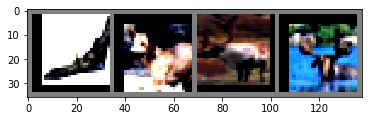

In [8]:
from utils.showimgs import utils_showimgs
utils_showimgs().getRandomTrainImgs(trainDataset,train_loader)

**8. Import and load Resnet18 model on to respective device (GPU or CPU)**

In [9]:
#from models.cifar10_model import Net
from models import resnet
#dir(resnet)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('Model is going to run on device : {}'.format(device))
model = resnet.ResNet18().to(device)
summary(model,(3,32,32))

Model is going to run on device : cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728


**9. Define loss function and optimizer for model**

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

#net = model
#criterion = nn.CrossEntropyLoss()
#criterion = nn.NLLLoss()
#optimizer = optim.Adam(model.parameters(), lr = 0.01)
#optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)'''

**10. Run Train and Test**

In [11]:
from lib import trainTestMethods
for epoch in range(20):
    trainTestMethods.train(model, train_loader, device, optimizer, criterion, epoch)
    trainTestMethods.test(model, test_loader, device, criterion, epoch)


Epoch: 0
 [================================================================>]  Step: 87ms | Tot: 52s794ms | Train >> Loss: 1.616 | Acc: 39.878% (19939/50000) 391/391 
 [================================================================>]  Step: 63ms | Tot: 3s331ms | Test >> Loss: 1.331 | Acc: 51.430% (5143/10000) 79/79 

Epoch: 1
 [================================================================>]  Step: 89ms | Tot: 54s15ms | Train >> Loss: 1.185 | Acc: 57.290% (28645/50000) 391/391 
 [================================================================>]  Step: 64ms | Tot: 3s419ms | Test >> Loss: 1.053 | Acc: 62.450% (6245/10000) 79/79 

Epoch: 2
 [================================================================>]  Step: 93ms | Tot: 54s429ms | Train >> Loss: 0.964 | Acc: 65.686% (32843/50000) 391/391 
 [================================================================>]  Step: 62ms | Tot: 3s397ms | Test >> Loss: 0.925 | Acc: 67.070% (6707/10000) 79/79 

Epoch: 3
 [==========================